# (12주차) 5월23일

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-xOfpHJG0LrtYt4TUVgqUNy

## imports

In [1]:
import tensorflow as tf
import tensorflow.experimental.numpy as tnp

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## CNN

### CONV의 역할

`-` 데이터생성 (그냥 흑백대비 데이터)

In [31]:
_X1 = tnp.ones([50,25])*10 
_X1

<tf.Tensor: shape=(50, 25), dtype=float64, numpy=
array([[10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       ...,
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.]])>

In [32]:
_X2 = tnp.zeros([50,25])*10 
_X2

<tf.Tensor: shape=(50, 25), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])>

In [33]:
tf.concat([_X1,_X2],axis=1)

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       ...,
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.]])>

In [34]:
_noise = tnp.random.randn(50*50).reshape(50,50)
_noise

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[ 0.35732807,  1.6413663 , -1.54550608, ..., -0.99372603,
        -0.80063882, -0.47603893],
       [ 0.85670109,  0.46950772, -0.62311101, ..., -0.16400863,
         0.25182769, -1.09861216],
       [ 1.26690026, -1.82435465,  1.38913379, ...,  0.86919244,
         1.01325465, -1.26078389],
       ...,
       [-0.09952044, -1.10685406, -0.38417712, ..., -0.86984483,
         2.0524653 ,  0.04509691],
       [-0.75945775, -0.17465888,  0.13909331, ...,  1.36400706,
         1.63601326, -1.35901751],
       [ 0.10619969, -0.65262368,  1.18958512, ...,  1.78584869,
        -0.35470922,  1.61503584]])>

In [35]:
XXX = tf.concat([_X1,_X2],axis=1) + _noise

In [36]:
XXX=XXX.reshape(1,50,50,1)

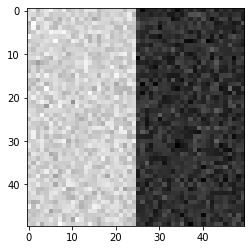

In [37]:
plt.imshow(XXX.reshape(50,50),cmap='gray')

`-` conv layer 생성 

In [11]:
conv = tf.keras.layers.Conv2D(2,(2,2)) 

In [12]:
conv.weights # 처음에는 가중치가 없음 

[]

In [13]:
conv(XXX) # 가중치를 만들기 위해서 XXX를 conv에 한번 통과시킴

<tf.Tensor: shape=(1, 49, 49, 2), dtype=float32, numpy=
array([[[[ 8.56478   , 19.004282  ],
         [ 7.574851  , 18.730434  ],
         [ 7.974391  , 19.009115  ],
         ...,
         [ 0.19067329, -1.0568992 ],
         [ 2.1192505 , -0.463604  ],
         [ 0.32578397,  0.19156235]],

        [[ 6.5009694 , 17.945038  ],
         [ 7.373703  , 18.017208  ],
         [ 6.3373337 , 17.757906  ],
         ...,
         [-2.3422227 , -2.4566412 ],
         [-1.4740658 , -1.6281561 ],
         [-0.22358713,  0.5996071 ]],

        [[ 7.9080896 , 19.031002  ],
         [ 7.6444087 , 19.674181  ],
         [ 7.965529  , 20.407492  ],
         ...,
         [ 0.9321191 ,  1.265028  ],
         [-0.14039274,  1.3051106 ],
         [ 1.3274393 ,  0.5792097 ]],

        ...,

        [[ 7.7920923 , 20.0912    ],
         [ 6.4217854 , 18.025333  ],
         [ 7.180077  , 17.274769  ],
         ...,
         [ 0.4666239 ,  1.3974427 ],
         [ 0.41347742,  1.1964546 ],
         [ 0.1392

In [15]:
conv.weights # 이제 가중치가 생김

[<tf.Variable 'conv2d/kernel:0' shape=(2, 2, 1, 2) dtype=float32, numpy=
 array([[[[ 0.4852683 ,  0.65750855]],
 
         [[ 0.37276834,  0.5606143 ]]],
 
 
        [[[-0.43573418,  0.5255446 ]],
 
         [[ 0.34414464,  0.17508322]]]], dtype=float32)>,
 <tf.Variable 'conv2d/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

`-` 가중치의 값을 확인해보자. 

In [16]:
conv.weights[0] # kernel에 해당하는것 

<tf.Variable 'conv2d/kernel:0' shape=(2, 2, 1, 2) dtype=float32, numpy=
array([[[[ 0.4852683 ,  0.65750855]],

        [[ 0.37276834,  0.5606143 ]]],


       [[[-0.43573418,  0.5255446 ]],

        [[ 0.34414464,  0.17508322]]]], dtype=float32)>

In [17]:
conv.weights[1] # bias에 해당하는것 

<tf.Variable 'conv2d/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

`-` 필터값을 원하는 것으로 변경해보자. 

In [16]:
w0 = [[0.25,0.25],[0.25,0.25]] # 잡티를 제거하는 효과를 준다. 
w1 = [[-1.0,1.0],[-1.0,1.0]] # 경계를 찾기 좋아보이는 필터이다. (엣지검출)

In [17]:
w=np.concatenate([np.array(w0).reshape(2,2,1,1),np.array(w1).reshape(2,2,1,1)],axis=-1)
w

array([[[[ 0.25, -1.  ]],

        [[ 0.25,  1.  ]]],


       [[[ 0.25, -1.  ]],

        [[ 0.25,  1.  ]]]])

In [18]:
b= np.array([0.0,0.0])
b

array([0., 0.])

In [19]:
conv.set_weights([w,b])
conv.get_weights()

[array([[[[ 0.25, -1.  ]],
 
         [[ 0.25,  1.  ]]],
 
 
        [[[ 0.25, -1.  ]],
 
         [[ 0.25,  1.  ]]]], dtype=float32), array([0., 0.], dtype=float32)]

- 첫번째는 평균을 구하는 필터, 
- 두번째는 엣지를 검출하는 필터 

`-` 필터를 넣은 결과를 확인 

In [20]:
XXX0=conv(XXX)[...,0] # 채널0
XXX0

<tf.Tensor: shape=(1, 49, 49), dtype=float32, numpy=
array([[[ 9.686165  ,  9.821035  , 10.002783  , ...,  0.08007751,
         -0.40035886, -0.7117615 ],
        [ 9.636944  ,  9.790447  ,  9.583614  , ..., -0.23059136,
         -1.0077691 , -0.48573163],
        [10.31364   , 10.516742  ,  9.706322  , ...,  0.1841195 ,
         -0.06590554,  0.22185218],
        ...,
        [ 9.621857  ,  9.550551  ,  9.497271  , ...,  0.6734947 ,
         -0.08413357, -0.7168423 ],
        [10.119719  ,  9.729369  ,  9.200346  , ...,  0.14961044,
         -0.45019603, -0.5179433 ],
        [10.44169   ,  9.835292  ,  8.760483  , ..., -0.8874421 ,
         -0.80109036,  0.23252432]]], dtype=float32)>

In [23]:
XXX1=conv(XXX)[...,1] # 채널1
XXX1

<tf.Tensor: shape=(1, 49, 49), dtype=float32, numpy=
array([[[-2.8797626 ,  3.4192448 , -2.692257  , ..., -1.2208977 ,
         -0.7008478 , -0.5447626 ],
        [-1.874382  ,  2.4883957 , -3.3157272 , ..., -4.5279074 ,
          1.4191961 ,  0.6689538 ],
        [ 0.87922287, -0.06681442, -3.1748657 , ..., -3.3367229 ,
          2.3366227 , -1.1855917 ],
        ...,
        [ 1.5189819 , -1.804203  ,  1.5910797 , ...,  1.1511078 ,
         -4.1816206 ,  1.6507858 ],
        [ 1.7114105 , -3.272808  ,  1.1567173 , ..., -0.8776298 ,
         -1.521596  ,  1.2506067 ],
        [ 1.5809326 , -4.006527  , -0.29271126, ..., -1.8408056 ,
          2.1862125 ,  1.948246  ]]], dtype=float32)>

`-` 각 채널을 시각화 

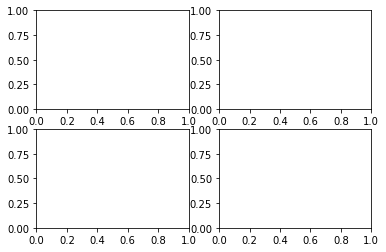

In [24]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)

In [25]:
ax1.imshow(XXX.reshape(50,50),cmap='gray')

In [26]:
ax3.imshow(XXX0.reshape(49,49),cmap='gray')

In [27]:
ax4.imshow(XXX1.reshape(49,49),cmap='gray')

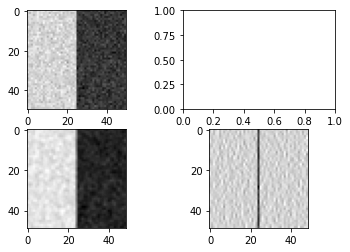

In [28]:
fig

- 2사분면: 원래이미지 
- 3사분면: 원래이미지 -> 평균을 의미하는 conv적용 
- 4사분면: 원래이미지 -> 엣지를 검출하는 conv적용

`-` conv(XXX)의 각 채널에 한번더 conv를 통과시켜보자

In [29]:
conv(XXX0.reshape(1,49,49,1))[...,0] ### XXX0 -> 평균필터 <=> XXX -> 평균필터 -> 평균필터 
conv(XXX0.reshape(1,49,49,1))[...,1] ### XXX0 -> 엣지필터 <=> XXX -> 평균필터 -> 엣지필터 
conv(XXX1.reshape(1,49,49,1))[...,0] ### XXX1 -> 평균필터 <=> XXX -> 엣지필터 -> 평균필터 
conv(XXX1.reshape(1,49,49,1))[...,1] ### XXX1 -> 엣지필터 <=> XXX -> 엣지필터 -> 엣지필터 

<tf.Tensor: shape=(1, 48, 48), dtype=float32, numpy=
array([[[ 10.661785  , -11.915625  ,   8.694088  , ...,  -8.103132  ,
           6.4671535 ,  -0.59415716],
        [  3.4167404 ,  -8.912174  ,  11.209547  , ..., -12.895272  ,
          11.620449  ,  -4.2724566 ],
        [ -2.6062584 ,  -1.1375389 ,   5.1270504 , ...,  -5.6994057 ,
           1.0897017 ,   3.5527542 ],
        ...,
        [ -3.345789  ,   1.050684  ,  -1.4384975 , ...,   0.15103805,
          -6.9143505 ,  10.635868  ],
        [ -8.307404  ,   7.824808  ,   0.42079735, ...,  -1.5494564 ,
          -5.9766946 ,   8.604609  ],
        [-10.571678  ,   8.143341  ,   4.2809143 , ...,  -0.22970343,
           3.383052  ,   2.534236  ]]], dtype=float32)>

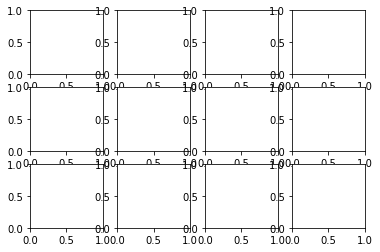

In [30]:
fig,ax =plt.subplots(3,4)

In [31]:
ax[0][0].imshow(XXX.reshape(50,50),cmap='gray') # 원래이미지

In [32]:
ax[1][0].imshow(XXX0.reshape(49,49),cmap='gray') # 원래이미지 -> 평균필터 
ax[1][2].imshow(XXX1.reshape(49,49),cmap='gray') # 원래이미지 -> 엣지필터

In [33]:
ax[2][0].imshow(conv(XXX0.reshape(1,49,49,1))[...,0].reshape(48,48),cmap='gray') # 원래이미지 -> 평균필터 -> 평균필터 
ax[2][1].imshow(conv(XXX0.reshape(1,49,49,1))[...,1].reshape(48,48),cmap='gray') # 원래이미지 -> 평균필터 -> 엣지필터
ax[2][2].imshow(conv(XXX1.reshape(1,49,49,1))[...,0].reshape(48,48),cmap='gray') # 원래이미지 -> 엣지필터 -> 평균필터 
ax[2][3].imshow(conv(XXX1.reshape(1,49,49,1))[...,1].reshape(48,48),cmap='gray') # 원래이미지 -> 엣지필터 -> 엣지필터

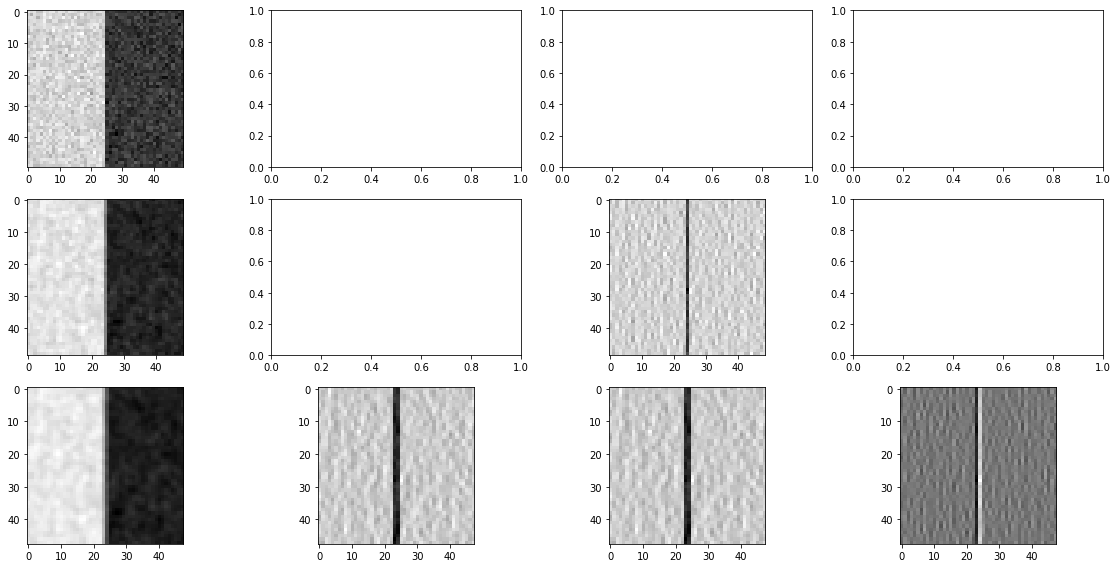

In [34]:
fig.set_figheight(8)
fig.set_figwidth(16)
fig.tight_layout()
fig

`-` 요약 
- conv의 weight에 따라서 엣지를 검출하는 필터가 만들어지기도 하고 스무딩의 역할을 하는 필터가 만들어지기도 한다. 그리고 우리는 의미를 알 수 없지만 어떠한 역할을 하는 필터가 만들어질 것이다. 
- 이것들을 조합하다보면 우연히 이미지를 분류하기에 유리한 특징을 뽑아내는 weight가 맞춰질 수도 있겠다. 
- 채널수를 많이 만들고 다양한 웨이트조합을 실험하다보면 보다 복잡한 이미지의 특징을 추출할 수도 있을 것이다? 
- 컨볼루션 레이어의 역할 = 이미지의 특징을 추출하는 역할 

`-` 참고: 스트라이드, 패딩
- 스트라이드: 윈도우가 1칸씩 이동하는 것이 아니라 2~3칸씩 이동함 
- 패딩: 이미지의 가장자리에 정당한 값을 넣어서 (예를들어 0) 컨볼루션을 수행. 따라서 컨볼루션 연산 이후에도 이미지의 크기가 줄어들지 않도록 방지한다. 

### MAXPOOL

`-` 기본적역할: 이미지의 크기를 줄이는 것 
- 이미지의의 크기를 줄여야하는 이유? 어차피 최종적으로 10차원으로 줄어야하므로 
- 이미지의 크기를 줄이면서도 동시에 아주 크리티컬한 특징은 손실없이 유지하고 싶다~

`-` 점점 작은 이미지가 되면서 중요한 특징들은 살아남지만 그렇지 않으면 죽는다. (캐리커쳐 느낌)

`-` 평균이 아니라 max를 쓴 이유는? 그냥 평균보다 나을것이라고 생각했음.. 
- 그런데 사실은 꼭 그렇지만은 않아서 최근에는 꼭 맥스풀링을 고집하진 않는 추세 (평균풀링도 많이씀) 

### CNN 아키텍처의 표현방법

`-` 아래와 같이 아키텍처의 다이어그램형태로 표현하고 굳이 노드별로 이미지를 그리진 않음

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/2560px-Comparison_image_neural_networks.svg.png)

`-` 물론 아래와 같이 그리는 경우도 있음

![](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

### Discussion about CNN 

`-` 격자형태로 배열된 자료를 처리하는데 특화된 신경망이다. 
- 시계열 (1차원격자), 이미지 (2차원격자)

`-` 실제응용에서 엄청난 성공을 거두었다. 

`-` 이름의 유래는 컨볼루션이라는 수학적 연산을 사용했기 때문 
- 컨볼루션은 조금 특별한 선형변환이다. 

`-` 신경과학의 원리가 심층학습에 영향을 미친 사례이다. 

### CNN의 모티브

`-` 희소성 + 매개변수의 공유
- 다소 철학적인 모티브임 
- 희소성: 이미지를 분석하여 특징을 뽑아낼때 부분부분의 특징만 뽑으면 된다는 의미 
- 매개변수의 공유: 한 채널에는 하나의 역할을 하는 커널을 설계하면 된다는 의미 (스무딩이든 엣징이든). 즉 어떤지역은 스무딩, 어떤지역은 엣징을 할 필요가 없이 한채널에서는 엣징만, 다른채널에서는 스무딩만 수행한뒤 여러채널을 조합해서 이해하면 된다. 

`-` 매개변수 공유효과로 인해서 파라메터가 확 줄어든다. 

(예시) (1,6,6,1) -> (1,5,5,2) 
- MLP방식이면 (36,50) 의 차원을 가진 매트릭스가 필요함 => 1800개의 매개변수 필요
- CNN은 8개의 매개변수 필요

### CNN 신경망의 기본구조 

`-` 기본유닛 
- conv - activation - pooling
- conv - conv - activation - pooling

## 모형의 성능을 올리기 위한 노력들 

### dropout 

`-` 아래의 예제를 복습하자. 

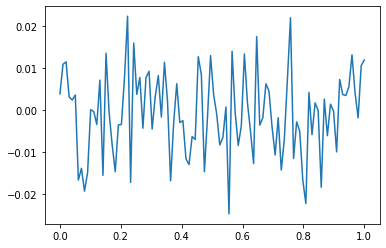

In [35]:
np.random.seed(43052)
x = np.linspace(0,1,100).reshape(100,1)
y = np.random.normal(loc=0,scale=0.01,size=(100,1))
plt.plot(x,y)

In [36]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(2048,activation='relu'))
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(x,y,epochs=5000,verbose=0,batch_size=100)

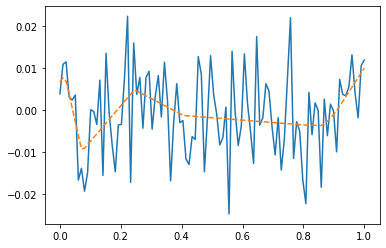

In [37]:
plt.plot(x,y)
plt.plot(x,net(x),'--')

`-` train/test로 나누어서 생각해보자.

In [38]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(2048,activation='relu'))
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(x[:80],y[:80],epochs=5000,verbose=0,batch_size=80)

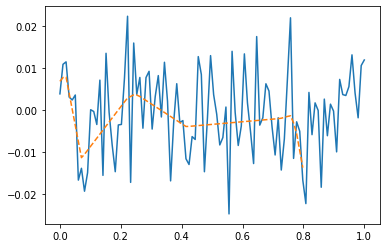

In [39]:
plt.plot(x,y)
plt.plot(x[:80],net(x[:80]),'--')

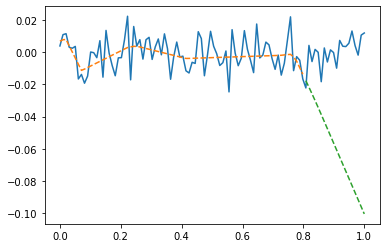

In [40]:
plt.plot(x,y)
plt.plot(x[:80],net(x[:80]),'--') # train
plt.plot(x[80:],net(x[80:]),'--') # test

- train에서 추세를 따라가는게 좋은게 아니다 $\to$ 그냥 직선으로 핏하는거 이외에는 다 오버핏이다. 

`-` 매 에폭마다 적당히 80%의 노드들을 빼고 학습하자 $\to$ 너무 잘 학습되는 문제는 생기지 않을 것이다 (과적합이 방지될것이다?)

In [41]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(2048,activation='relu'))
net.add(tf.keras.layers.Dropout(0.8))
net.add(tf.keras.layers.Dense(1))
net.compile(loss='mse',optimizer='adam')
net.fit(x[:80],y[:80],epochs=5000,verbose=0,batch_size=80)

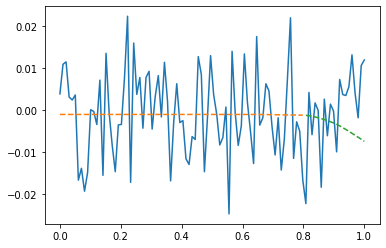

In [42]:
plt.plot(x,y)
plt.plot(x[:80],net(x[:80]),'--')
plt.plot(x[80:],net(x[80:]),'--')

`-` 드랍아웃에 대한 summary
- 직관: 특정노드를 랜덤으로 off시키면 학습이 방해되어 오히려 과적합이 방지되는 효과가 있다 (그렇지만 진짜 중요한 특징이라면 랜덤으로 off 되더라도 어느정도는 학습될 듯)
- note: 드랍아웃을 쓰면 오버핏이 줄어드는건 맞지만 완전히 없어지는건 아니다. 
- note: 오버핏을 줄이는 유일한 방법이 드랍아웃만 있는것도 아니며, 드랍아웃이 오버핏을 줄이는 가장 효과적인 방법도 아니다 (최근에는 dropout보다 batch nomalization을 사용하는 추세임)

### train / val / test 

`-` data

In [43]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [44]:
X= x_train.reshape(-1,28,28,1)/255 ## 입력이 0~255 -> 0~1로 표준화 시키는 효과 + float으로 자료형이 바뀜 
y = tf.keras.utils.to_categorical(y_train)
XX = x_test.reshape(-1,28,28,1)/255
yy = tf.keras.utils.to_categorical(y_test)

In [45]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(50,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [46]:
#collapse_output
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1) 

Epoch 1/200
240/240 [==============================] - 2s 5ms/step - loss: 0.7013 - accuracy: 0.7664 - val_loss: 0.4974 - val_accuracy: 0.8318
Epoch 2/200
240/240 [==============================] - 1s 4ms/step - loss: 0.4706 - accuracy: 0.8397 - val_loss: 0.4831 - val_accuracy: 0.8321
Epoch 3/200
240/240 [==============================] - 1s 4ms/step - loss: 0.4293 - accuracy: 0.8514 - val_loss: 0.4371 - val_accuracy: 0.8522
Epoch 4/200
240/240 [==============================] - 1s 4ms/step - loss: 0.4065 - accuracy: 0.8593 - val_loss: 0.4087 - val_accuracy: 0.8576
Epoch 5/200
240/240 [==============================] - 1s 4ms/step - loss: 0.3864 - accuracy: 0.8654 - val_loss: 0.3983 - val_accuracy: 0.8606
Epoch 6/200
240/240 [==============================] - 1s 4ms/step - loss: 0.3727 - accuracy: 0.8691 - val_loss: 0.3904 - val_accuracy: 0.8616
Epoch 7/200
240/240 [==============================] - 1s 4ms/step - loss: 0.3619 - accuracy: 0.8738 - val_loss: 0.3873 - val_accuracy: 0.8659

`-` 텐서보드 여는 방법1

In [47]:
%load_ext tensorboard
# 주피터노트북 (혹은 주피터랩)에서 텐서보드를 임베딩하여 넣을 수 있도록 도와주는 매직펑션

In [ ]:
#
# !rm -rf logs
# !kill 313799
# !taskkill /pid 313799 # <- 윈도우에서 사용할 때 쓰는 방법

In [ ]:
#
# %tensorboard --logdir logs --host 0.0.0.0
# %tensorboard --logdir logs # <-- 실습에서는 이렇게 하면됩니다. 

In [51]:
%tensorboard --logdir logs

In [50]:
!rm -rf logs
!kill 1455

(참고사항) 파이썬 3.10의 경우 아래의 수정이 필요

`?/python3.10/site-packages/tensorboard/_vendor/html5lib/_trie/_base.py` 을 열고
```python
from collections import Mapping ### 수정전
from collections.abc import Mapping ### 수정후 
```
와 같이 수정한다. 

- 왜냐하면 파이썬 3.10부터 `from collections import Mapping` 가 동작하지 않고 `from collections.abc import Mapping` 가 동작하도록 문법이 바뀜

`-` 텐서보드를 실행하는 방법2

In [ ]:
#
# !tensorboard --logdir logs --host 0.0.0.0
# !tensorboard --logdir logs # <-- 실습에서는 이렇게 하면됩니다. 

### 조기종료 

`-` 텐서보드를 살펴보니 특정에폭 이후에는 오히려 과적합이 진행되는 듯 하다 (학습할수록 손해인듯 하다) $\to$ 그 특정에폭까지만 학습해보자

In [ ]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 과적합좀 시키려고 
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 레이어를 2장만듬 + 레이어하나당 노드수도 증가 
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [ ]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 1s 4ms/step - loss: 0.5483 - accuracy: 0.8134 - val_loss: 0.4027 - val_accuracy: 0.8546
Epoch 2/200
240/240 [==============================] - 1s 3ms/step - loss: 0.3568 - accuracy: 0.8671 - val_loss: 0.3531 - val_accuracy: 0.8712
Epoch 3/200
240/240 [==============================] - 1s 3ms/step - loss: 0.3210 - accuracy: 0.8799 - val_loss: 0.3477 - val_accuracy: 0.8733
Epoch 4/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2971 - accuracy: 0.8876 - val_loss: 0.3502 - val_accuracy: 0.8776


In [ ]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2791 - accuracy: 0.8935 - val_loss: 0.3224 - val_accuracy: 0.8820
Epoch 2/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2619 - accuracy: 0.8999 - val_loss: 0.3498 - val_accuracy: 0.8779


In [ ]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2491 - accuracy: 0.9043 - val_loss: 0.3641 - val_accuracy: 0.8711
Epoch 2/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2328 - accuracy: 0.9110 - val_loss: 0.3282 - val_accuracy: 0.8848
Epoch 3/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2254 - accuracy: 0.9151 - val_loss: 0.3280 - val_accuracy: 0.8843
Epoch 4/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2144 - accuracy: 0.9177 - val_loss: 0.3191 - val_accuracy: 0.8925
Epoch 5/200
240/240 [==============================] - 1s 3ms/step - loss: 0.2074 - accuracy: 0.9223 - val_loss: 0.3152 - val_accuracy: 0.8949
Epoch 6/200
240/240 [==============================] - 1s 3ms/step - loss: 0.1952 - accuracy: 0.9250 - val_loss: 0.3322 - val_accuracy: 0.8863


In [ ]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 1s 3ms/step - loss: 0.1908 - accuracy: 0.9257 - val_loss: 0.3513 - val_accuracy: 0.8836
Epoch 2/200
240/240 [==============================] - 1s 3ms/step - loss: 0.1799 - accuracy: 0.9304 - val_loss: 0.3376 - val_accuracy: 0.8901
Epoch 3/200
240/240 [==============================] - 1s 3ms/step - loss: 0.1712 - accuracy: 0.9346 - val_loss: 0.3568 - val_accuracy: 0.8894


In [ ]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=1) # val-loss가 1회증가하면 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 1s 3ms/step - loss: 0.1591 - accuracy: 0.9367 - val_loss: 0.3995 - val_accuracy: 0.8780
Epoch 2/200
240/240 [==============================] - 1s 3ms/step - loss: 0.1552 - accuracy: 0.9398 - val_loss: 0.3469 - val_accuracy: 0.8917
Epoch 3/200
240/240 [==============================] - 1s 3ms/step - loss: 0.1481 - accuracy: 0.9423 - val_loss: 0.3726 - val_accuracy: 0.8853


`-` 몇 번 좀 참았다가 멈추면 좋겠다. 

In [52]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 과적합좀 시키려고 
net.add(tf.keras.layers.Dense(5000,activation='relu')) ## 레이어를 2장만듬 + 레이어하나당 노드수도 증가 
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [53]:
#
#cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=5) # 좀더 참다가 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=cb2,verbose=1) 

Epoch 1/200
240/240 [==============================] - 230s 954ms/step - loss: 0.5503 - accuracy: 0.8114 - val_loss: 0.3909 - val_accuracy: 0.8570
Epoch 2/200
240/240 [==============================] - 227s 947ms/step - loss: 0.3571 - accuracy: 0.8674 - val_loss: 0.3671 - val_accuracy: 0.8667
Epoch 3/200
240/240 [==============================] - 226s 944ms/step - loss: 0.3225 - accuracy: 0.8796 - val_loss: 0.3484 - val_accuracy: 0.8761
Epoch 4/200
240/240 [==============================] - 226s 940ms/step - loss: 0.3017 - accuracy: 0.8867 - val_loss: 0.3448 - val_accuracy: 0.8778
Epoch 5/200
240/240 [==============================] - 225s 938ms/step - loss: 0.2813 - accuracy: 0.8951 - val_loss: 0.3313 - val_accuracy: 0.8787
Epoch 6/200
240/240 [==============================] - 225s 936ms/step - loss: 0.2620 - accuracy: 0.9008 - val_loss: 0.3286 - val_accuracy: 0.8822
Epoch 7/200
240/240 [==============================] - 224s 934ms/step - loss: 0.2469 - accuracy: 0.9074 - val_loss: 0

`-` 텐서보드로 그려보자?

In [ ]:
#
#%tensorboard --logdir logs --host 0.0.0.0 
# 아무것도 안나온다 -> 왜? cb1을 써야 텐서보드가 나옴

In [57]:
#%tensorboard --logdir logs

In [56]:
!rm -rf logs
!kill 1679

`-` 조기종료와 텐서보드를 같이 쓰려면?

In [58]:
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(50,activation='relu')) 
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [59]:
cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=7) # 좀더 참다가 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=[cb1,cb2]) 

Epoch 1/200
240/240 [==============================] - 2s 5ms/step - loss: 0.7184 - accuracy: 0.7581 - val_loss: 0.5077 - val_accuracy: 0.8276
Epoch 2/200
240/240 [==============================] - 1s 4ms/step - loss: 0.4752 - accuracy: 0.8386 - val_loss: 0.4786 - val_accuracy: 0.8347
Epoch 3/200
240/240 [==============================] - 1s 4ms/step - loss: 0.4305 - accuracy: 0.8513 - val_loss: 0.4376 - val_accuracy: 0.8497
Epoch 4/200
240/240 [==============================] - 1s 4ms/step - loss: 0.4047 - accuracy: 0.8587 - val_loss: 0.4033 - val_accuracy: 0.8597
Epoch 5/200
240/240 [==============================] - 1s 4ms/step - loss: 0.3833 - accuracy: 0.8670 - val_loss: 0.3939 - val_accuracy: 0.8620
Epoch 6/200
240/240 [==============================] - 1s 4ms/step - loss: 0.3701 - accuracy: 0.8699 - val_loss: 0.3836 - val_accuracy: 0.8652
Epoch 7/200
240/240 [==============================] - 1s 4ms/step - loss: 0.3572 - accuracy: 0.8755 - val_loss: 0.3815 - val_accuracy: 0.8669

In [ ]:
# 
# 조기종료가 구현된 그림이 출력
# %tensorboard --logdir logs --host 0.0.0.0 

In [63]:
%tensorboard --logdir logs

In [62]:
!rm -rf logs
!kill 1952

### 하이퍼파라메터 선택

`-` 하이퍼파라메터 설정

In [64]:
from tensorboard.plugins.hparams import api as hp

In [65]:
a=net.evaluate(XX,yy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3795 - accuracy: 0.8720


In [66]:
!rm -rf logs
for u in [50,5000]: 
    for d in [0.0,0.5]: 
        for o in ['adam','sgd']:
            logdir = 'logs/hpguebin_{}_{}_{}'.format(u,d,o)
            with tf.summary.create_file_writer(logdir).as_default():
                net = tf.keras.Sequential()
                net.add(tf.keras.layers.Flatten())
                net.add(tf.keras.layers.Dense(u,activation='relu'))
                net.add(tf.keras.layers.Dropout(d))
                net.add(tf.keras.layers.Dense(10,activation='softmax'))
                net.compile(optimizer=o,loss=tf.losses.categorical_crossentropy,metrics=['accuracy','Recall'])
                cb3 = hp.KerasCallback(logdir, {'유닛수':u, '드랍아웃비율':d, '옵티마이저':o})
                net.fit(X,y,epochs=3,callbacks=cb3)
                _rslt=net.evaluate(XX,yy)
                _mymetric=_rslt[1]*0.8 + _rslt[2]*0.2  
                tf.summary.scalar('애큐러시와리컬의가중평균(테스트셋)', _mymetric, step=1) 

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5255 - accuracy: 0.8181 - recall: 0.7546
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3996 - accuracy: 0.8582 - recall: 0.8286
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.4039 - accuracy: 0.8538 - recall: 0.8318
Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7744 - accuracy: 0.7503 - recall: 0.5797
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5204 - accuracy: 0.8223 - recall: 0.7565
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.4899 - accuracy: 0.8304 - recall: 0.7831
Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7502 - accuracy: 0.7356 - recall: 0.6115
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5738 - accuracy: 0.7923 - recall: 0.7133
Epoch 3/3
313/313 [==============================] - 1s 2ms/

In [ ]:
#
#%tensorboard --logdir logs --host 0.0.0.0

In [69]:
%tensorboard --logdir logs

In [70]:
!rm -rf logs
!kill 2236

## 숙제

`-` 아래의 네트워크에서 옵티마이저를 adam, sgd를 선택하여 각각 적합시켜보고 testset의 loss를 성능비교를 하라. epoch은 5정도로 설정하라. 
```
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(50,activation='relu'))
net.add(tf.keras.layers.Dense(50,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer=???,loss=tf.losses.categorical_crossentropy,metrics=['accuracy','Recall'])
```